In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
#download the weather images and put them in a directory
paths = [ r'C:\Users\Chaot\Python stuff\07 - Basics of Machine Learning for Analysts\Data Brief + Data Sets\Weather',
          r'C:\Users\Chaot\Python stuff\07 - Basics of Machine Learning for Analysts' ]
first_path = paths[0]
second_path = paths[1]

folders = os.listdir(first_path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [8]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    first_path,
    target_size=(250 , 250),
    batch_size=40,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    first_path,
    target_size=(250 , 250),
    batch_size=40,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [9]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [11]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 20, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 386ms/step - accuracy: 0.8113 - loss: 0.0790 - val_accuracy: 0.8000 - val_loss: 0.0786
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9750 - loss: 0.0161 - val_accuracy: 0.8333 - val_loss: 0.0695
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 375ms/step - accuracy: 0.7890 - loss: 0.0801 - val_accuracy: 0.8250 - val_loss: 0.0654
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.0460 - val_accuracy: 0.7083 - val_loss: 0.1118
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 349ms/step - accuracy: 0.8968 - loss: 0.0406 - val_accuracy: 0.8100 - val_loss: 0.0787
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8500 - loss: 0.0640 - val_accuracy: 0.6250 - val_loss: 0.1600
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 381ms/step - accuracy: 0.8996 - loss: 0.0365 - val_accuracy: 0.8000 - val_loss: 0.0764
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8500 - loss: 0.0667 - val_accuracy: 0.8750 - 

In [12]:
results = pd.DataFrame(model.history.history)

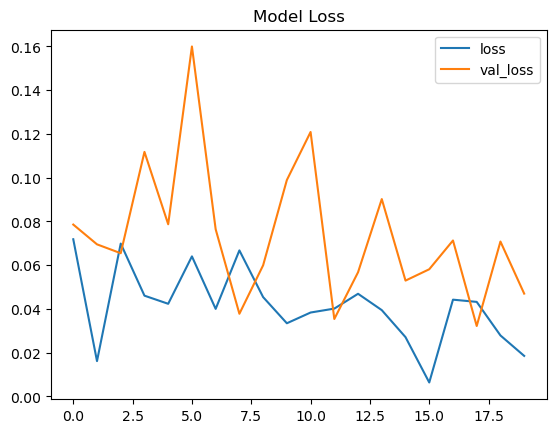

In [14]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig(os.path.join(second_path, 'Unsupervised', '2.5_loss.png'))

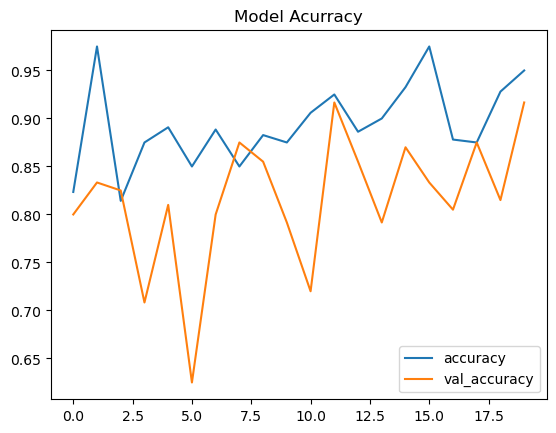

In [15]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig(os.path.join(second_path, 'Unsupervised', '2.5_accuracy.png'))

In [16]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.949999988079071, Val_Accuracy: 0.9166666865348816
Loss: 0.01850634254515171, Val_Loss: 0.046985525637865067


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


<Figure size 640x480 with 0 Axes>

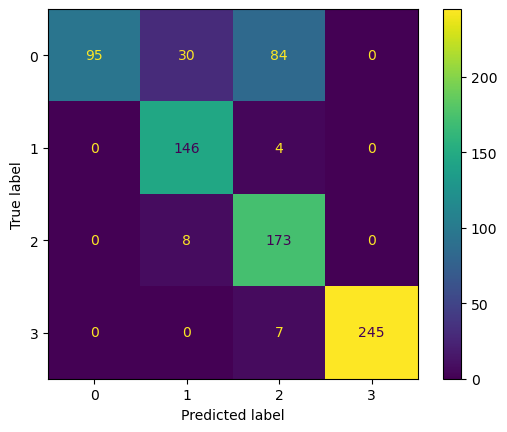

In [20]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 20 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, displ)
plt.savefig(os.path.join(second_path, 'Unsupervised', '2.5_gan_cm.png'))
disp.plot()
plt.show()

In [22]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        #plt.savefig(os.path.join(second_path, 'Unsupervised', '2.5_' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png'))
        plt.imshow(image)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


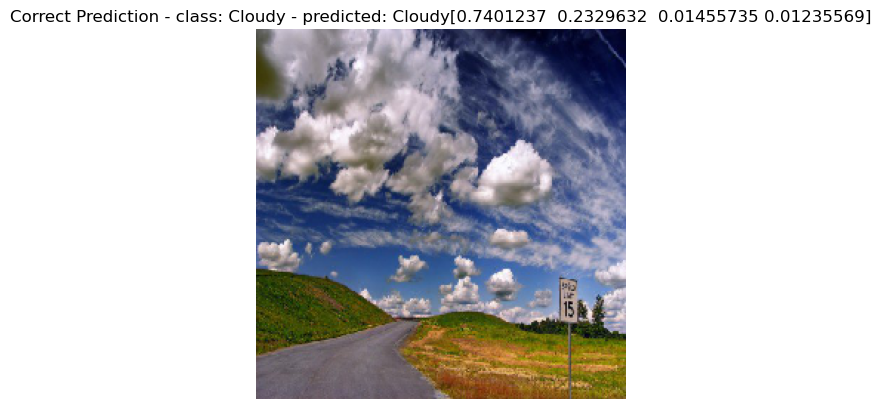

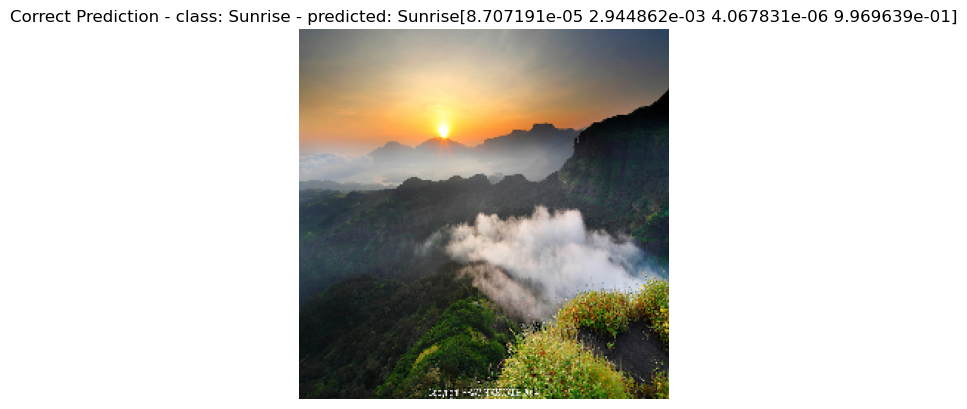

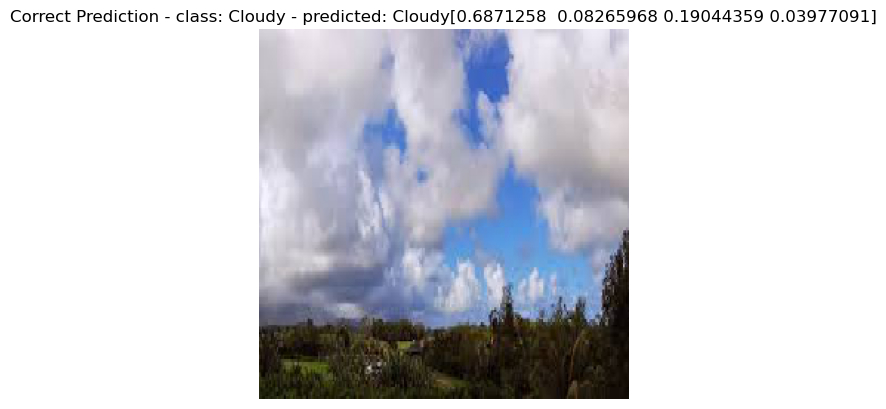

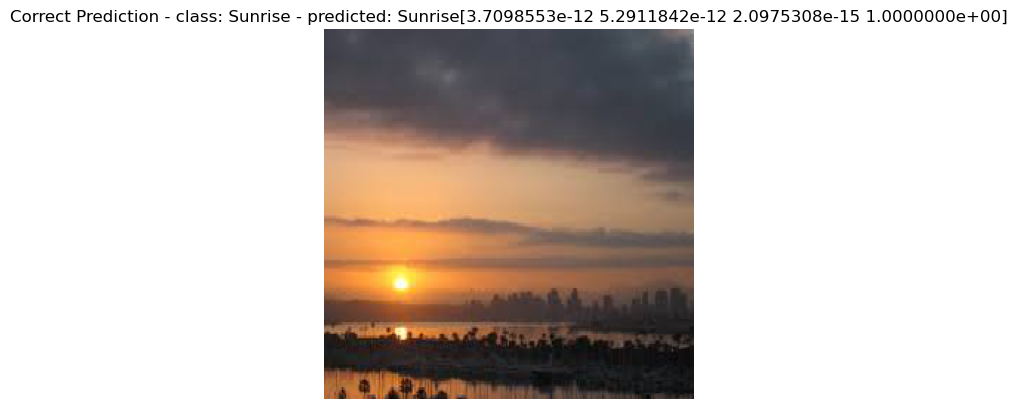

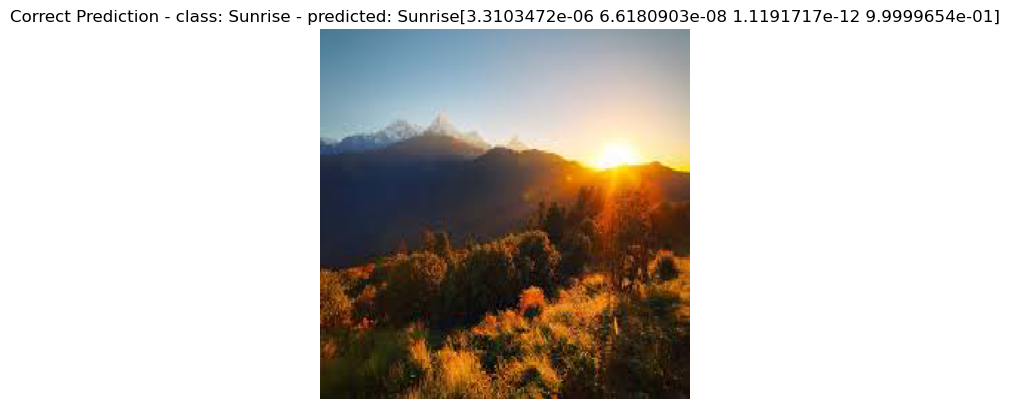

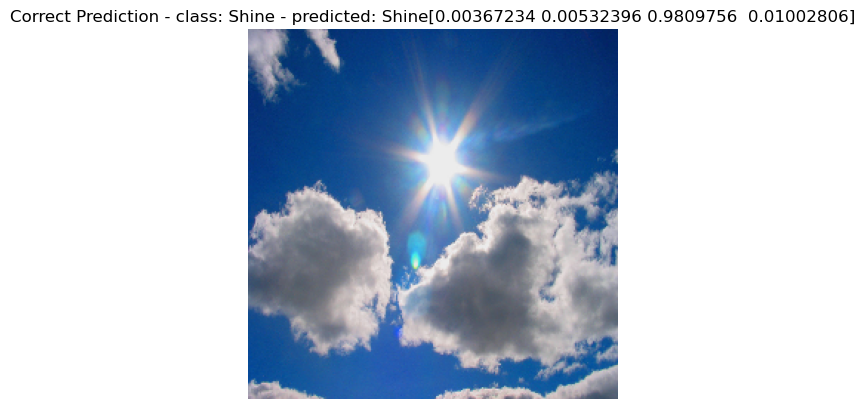

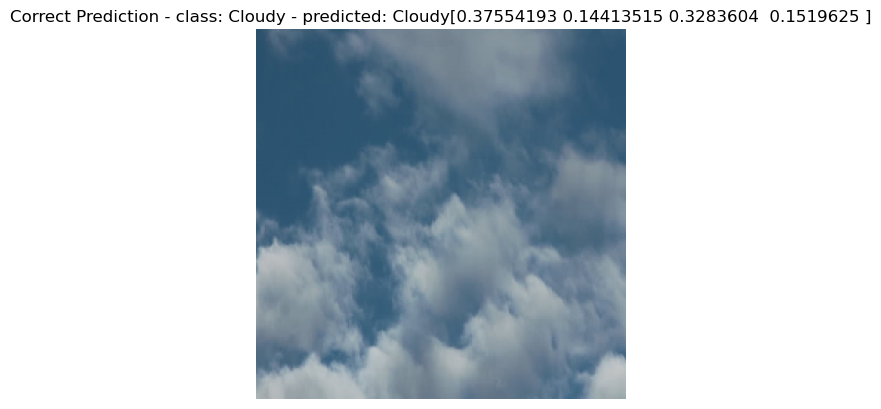

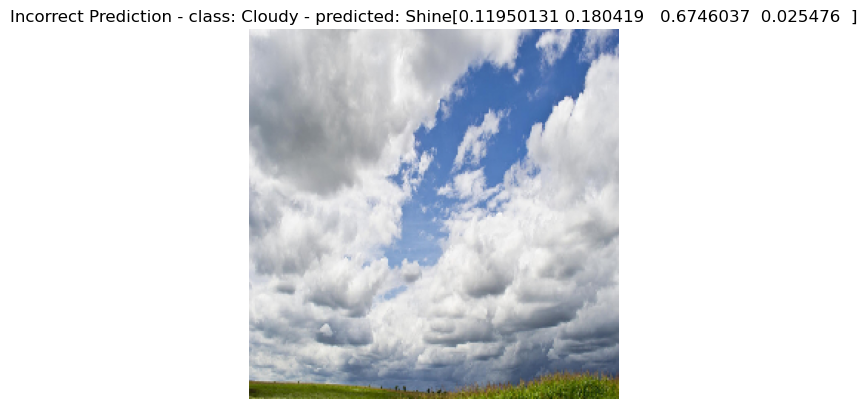

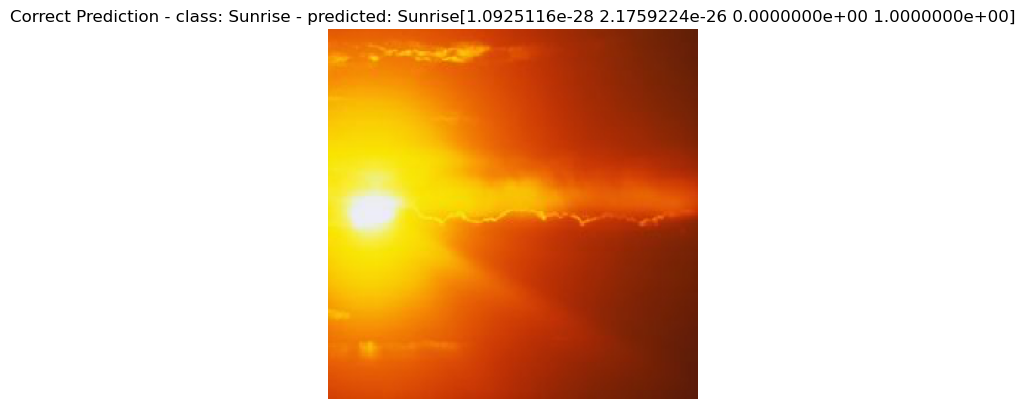

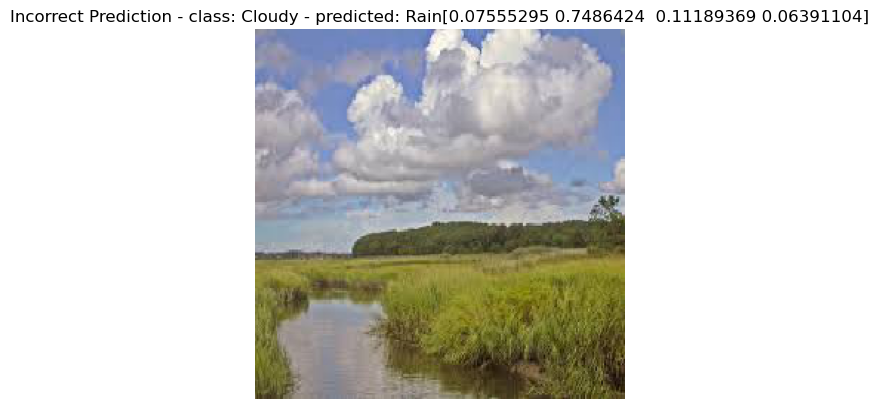

In [23]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.